> EbayesThresh

refer: [CRAN](http://CRAN.R-project.org/), [교수님 블로그](https://miruetoto.github.io/yechan3/posts/2_Studies/Reviews/2022-12-23-Ebayesthresh.html#cb2-3)

# My own Summary

:::{.callout-important}
- prior distribution에 의해 모델링되는 베이지안 모델 사용
- 여기서 말하는 $\mu_i$는 계수
    - $y =\mu_1 x + \mu_2 x_2+ \dots$
    - function에서 step function을 골라내는 과정(nonzero)
    - function에서 constitutional function은 남김(zero)
- $X$는 독립적이라고 가정, 완전히 독립적이지 않더라도 의존이 없으면 최소한 합리적인 결과 제공
- $\hat{\mu}$을 posterior distribution을 $|x| \le t(w)$일 경우에만 0이 되도록 monotonic function을 잡고, 베이지안 모델을 반복 적용하여 $\mu$ 추정치 구하기
- prior distribution이 dependent 하다면 marginal MLE로 추정된 weight이 $\mu$에 영향을 줄 것이고, posterior distribution의 중앙값이 영향을 받아 다음 베이지안 모델링에도 영향을 미침
- white noise 보다 stationary noise 에서 더 잘 작동
- 변환 잘 하면 어느 도메인에서도 동일하게 적용 가능

white noise vs stationary noise
:::

# Import

In [4]:
library(EbayesThresh)

# Introduction

Single observation $X_i$가 있을 때,

$$X_i = \mu_i + \epsilon_i$$

로 가정하고, $\epsilon_i$는 random variable이면서 

$$\epsilon_i \sim N(0,1)$$

라고 하자.

예를 들어  $\mu_i$가 sparse 하는 경우가 있을 수 있는데, 이 때 sequence $mu_i$의 more efficient estimators를 구하기 위해 EbayesThresh 패키지는 possible sparsity의 advantage를 취한다.(Empirical Bayes approach has excellent adaptivity properties, in particular by adjusting stably to the sparsity or otherwise of the underlying signal, by choosing an appropriate threshold from the data.)

만약 특정 $X_i$의 절댓값이 threshold 임계값 t를 초과하면 0이 아니라 $\mu_i$에 해당한다고 간주하고, 그렇지 않으면 0으로 간주함으로써 구별할 수 있다.


EbayesTHresh에서 사용된 **경험적 베이즈 접근법Empirical Bayes approach**은 Johnstone의 다른 논문에서 언급됨^[추후 review 작성예정]

위 논문에 따르면, 경험적 베이즈 방법은 underline signal 기본신호의 희소한 방법sparsity나 다른 방법들에 대해 안정적으로 조정하고, 데이터에서 적절한 임계값을 선택함으로써 훌륭한 적응성adaptivity 특성을 가진다. 

# Examples

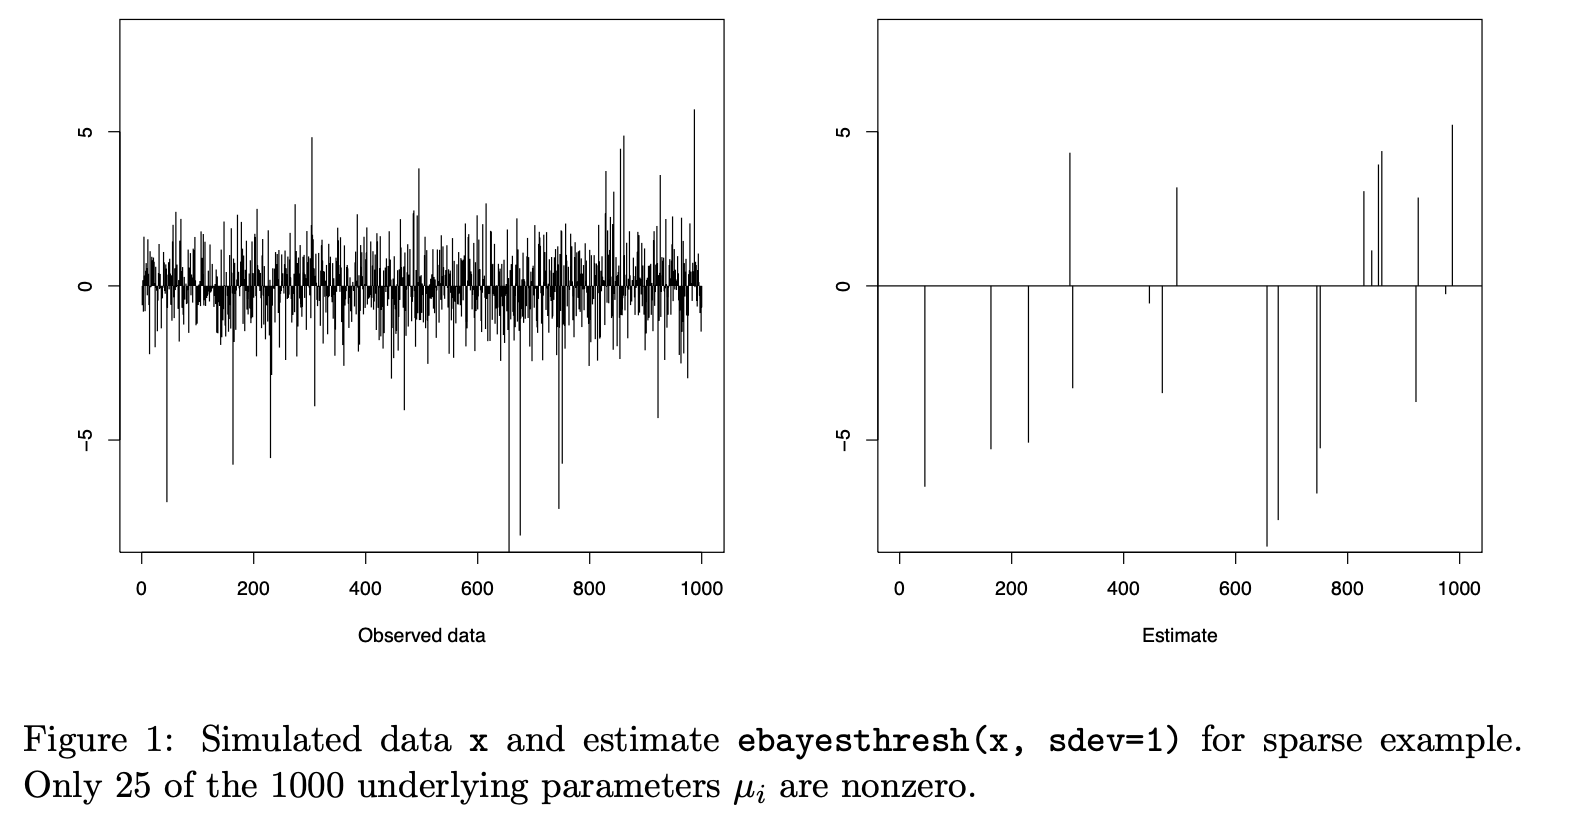

In [1]:
set.seed(1)
x <- rnorm(1000) + sample(c( runif(25,-7,7), rep(0,975)))

$X_i$에서 $\mu_i$ 추출 가능하는 것을 증명할 예제

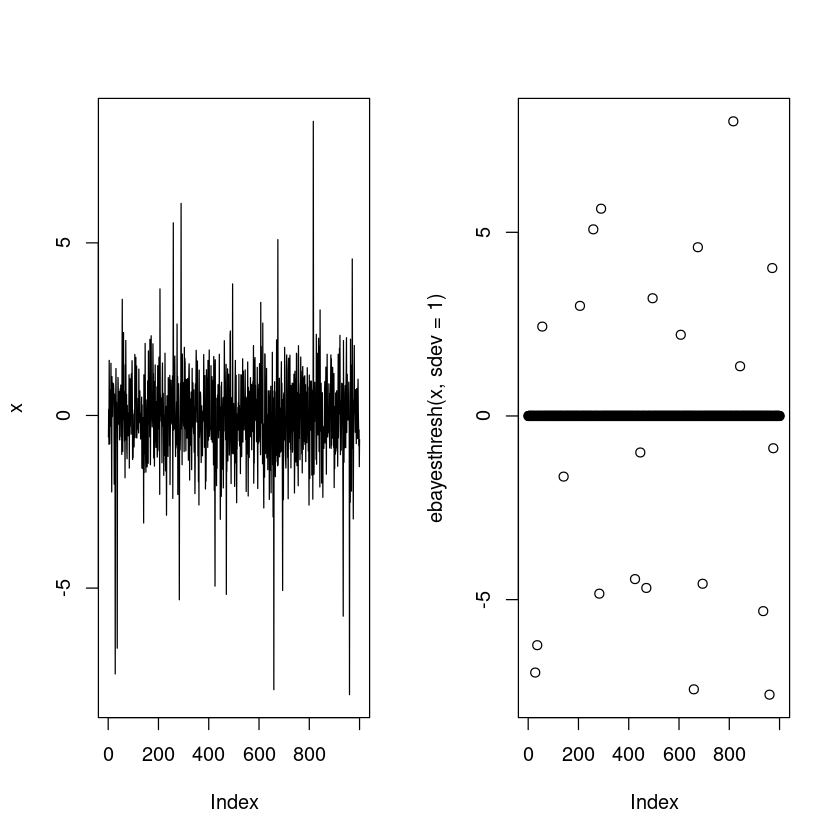

In [20]:
par(mfrow=c(1,2))
plot(x,type='l');plot(ebayesthresh(x, sdev=1))

데이터 설명

- n = 1000
- 25개의 nonzero entries uniformly distributed on(-7,7)

하지만 완전히 $\mu_i$를 분리해내는 것은 아님!

- Sparse signal
    - 임계값이 높으면 975개 중 4개를 제외한 모든 $\mu_i$가 0으로 추정됨.
    - 0이 아닌 25개 parameter 중 9개가 0으로 추정됨.(36% error rate)
    - $\to$ *threshold 적용하지 않은 경우보다 오류가 더 날 수 있다.*

- Dense signal
    - 750개 중 89개를 제외한 모든 $\mu_i$가 0으로 추정됨,
    - 0이 아닌 250개 parameter 중 51개가 0으로 추정됨.(20.4% error rate)

*check*

- parameter $\mu_i$에 베이지안 모델 사용
    - 이 모델 아래 각 $\mu_i$는 $(1-w)$확률로 $0$이고, a symmetric heavy-tailed density $\gamma$로부터 확률 $w$로 $\mu_i$가 나옴.
- $w$는 key parameter로서 marginal maximum likelihood 접근법으로 데이터에서 자동 선택되어 다음 베이지안 모델에서 바뀜.

In [24]:
mu <- ebayesthresh(x)

In [25]:
ebayesthresh(x, prior = "laplace", a = 0.5, bayesfac = FALSE,
       sdev = NA, verbose = FALSE, threshrule = "median")

[1]  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000
   [7]  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000
  [13]  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000
  [19]  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000
  [25]  0.00000000  0.00000000  0.00000000 -6.96955606  0.00000000  0.00000000
  [31]  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000 -6.22417961
  [37]  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000
  [43]  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000
  [49]  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000
  [55]  0.00000000  2.12041215  0.00000000  0.00000000  0.00000000  0.00000000
  [61]  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000
  [67]  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000
  [73]  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000
  [79]  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000
  [85]  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000
  [91]  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000
  [97]  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000
 [103]  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000
 [109]  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000
 [115]  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000
 [121]  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000
 [127]  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000
 [133]  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000
 [139]  0.00000000  0.00000000 -0.05309484  0.00000000  0.00000000  0.00000000
 [145]  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000
 [151]  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000
 [157]  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000
 [163]  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000
 [169]  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000
 [175]  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000
 [181]  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000
 [187]  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000
 [193]  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000
 [199]  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000
 [205]  0.00000000  2.85831567  0.00000000  0.00000000  0.00000000  0.00000000
 [211]  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000
 [217]  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000
 [223]  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000
 [229]  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000
 [235]  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000
 [241]  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000
 [247]  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000
 [253]  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000
 [259]  5.06367922  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000
 [265]  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000
 [271]  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000
 [277]  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000
 [283] -4.82149366  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000
 [289]  0.00000000  5.62584088  0.00000000  0.00000000  0.00000000  0.00000000
 [295]  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000
 [301]  0.00000000  0.00000000  0.00000000  0.0000000

- `sdev`: 잔차 $X_i - \mu_i$의 표준편차
- `verbose`: 기록용

**motivation**

- 만약 $\mu_i$가 합리적으로 sparse 하더라도, 중앙값의 절댓값이 0이 아닌 평균 $\mu_i$를 가진 관찰값에 영향을 끼치지 않을 것이다.
- 하지만 신호가 너무 sparse하면 에러 발생할 수 있기 때문에 주의해야 함.

In [81]:
n <- 1000
x <- rnorm(n) + sample(c(runif(25,-7,7), rep(0,n-25)))
print(sd(x))
print(median(abs(x)))

[1] 1.187169
[1] 0.6598395


:::{.callout-note}
우리는 보통 noise의 sd를 모름.

이때 Ebayes는 sd를 사후분포의 median 값으로 가정하는데, 예제는 위와 같음
:::

# Description of the method

## The Bayesian model

$X_i \sim N(\mu_i,1)$의 관측값이 있음.

베이지안 context에서 sparsity희소성의 개념은 parameter $\mu_i$의 사전 분포prior distribution에 의해 모델링됨.

논문에서는 독립적인 사전 분포를 가진 이 $\mu_i$를 모델링하는데, 각각 가지고 있는 mixture는 다음과 같음.

$$f_{prior}(\mu) = (1- w) \delta_0 (\mu) + w \gamma(\mu)$$

$\gamma$는 0이 아닌 부분으로 fixed unimodal symmetric density^[정규분포와 같이 중앙이 많고 꼬리가 양 옆으로 긴 분포]로 가정한다.

1. `prior`="lapace"를 설정하면 척도 매개변수scale parameter a > 0의 Laplace 밀도를 사용.
2. 아래의 식($\mu_i$의 density function)에서 a는 기본 0.5로 지정되고, 변경도 가능

$$\gamma_a(\mu) = \frac{1}{2} a \exp(-a|\mu|)$$

prior="schy"로 설정하면 a는 무시되고 $\mu$에 대한 $\gamma$의 분포가 아래와 같음

$$\mu|Θ = \theta \sim N(0,\theta^{-1} -1) \text{with} Θ \sim \text{Beta}(\frac{1}{2},1)$$

$u^{-2}$는 코시 분포 Cauchy dustribution^[n=1인 t분포와 비슷하다.]와 같은 weight를 가짐
    - 아래 density를 quasi-Cauchy density라 부름^[the main motivation for the quasi-Cauchy is its combination of heavy tails].
    - the combination of heavy tails^[꼬리tail이 지수함수보다 느리게 감소할 때 heavy tail이라 부름.]

$$\gamma(\mu) = (2\pi)^{-1/2} \{ 1-|mu| \tilde{\phi}(\mu)\emptyset(\mu)\}$$

## Thresholding rules

$X \sim N(\mu,1)$라 가정할 때, $X=x$에서 $\mu$ 조건부 posterior 분포를 찾을 수 있음.

$\hat{\mu}(x;w)$를 사후분포posterior distribution의 중앙값이라고 정의하자.

모든 고정된 $w$에 대해 $\hat{\mu}(x;w)$의 추정규칙은 $|x| \le t(w)$인 경우에만 $\hat{\mu}(x;w)= 0$이 되도록 임계값 속성을 갖는 $x$의 monotonic function이다.

observation이 있을때, 각 observation $X_i$에 각각 베이지안 절차를 적용해서 corresponding parameter $\mu_i$의 추정치를 구할 수 있다.

default set `threshrule`="dll"은 이 추정치로 사후 중위수 $\hat{\mu}(x;w)$을 사용

- $X_i$가 독립적인 경우 정확한 베이지안 절차
- *$X_i$가 정확하게 독립적이지 않으면 추정 절차에서 정보의 손실이 있지만, 너무 많은 의존성dependence이 없다면 방법은 최소한 합리적인 결과at least reasonable results를 제공할 것임.*

## Choosing the threshold

*Emperical Bayes approach의 핵심은 weight $w$를 mixing 하거나 임계값 $t(w)$와 동일하게 선택하는 것*

$X_i$가 독립적이라고 가정하면 marginal maximum likelihood approach에 의해 $w$ 추정할 수 있음.

$g = \gamma \star \emptyset$가 있을때, $\star$는 convolution 임. observation $X_i$의 주변 밀도는 아래와 같음

$$(1-w)\emptyset(x) + wg$$

$w$의 marginal maximum likelihood estimator $\hat{w}$를 marginal log likelihood 의 maximizer로 정의하고, 이는 임계값이 $t(w) \le \sqrt{2 logn}$을 만족하는 w에 대한 제약 조건에 따름.

$$\ell(w) = \sum^n_{i=1} \log \{ (1-w) \emptyset (X_i) + wg(X_i)\}$$

derivative도함수 $\ell'(w)$은 $w$의 monotonic function이므로 함수 g가 각각의 경우에 대해 다루기 쉽기 때문에 그 근은 수치적으로 매우 쉽게 찾을 수 있음.

임계값에서 Bound $\sqrt{2 log n}$는 표본 크기 n의 샘플에 대하여 universal threshold라고 부른다. 

점근적으로, n개의 독립적인 $N(0,1)$ 확률변수random variable 시퀀스의 최대 절대값임.

universal threshold를 사용하는 경우 높은 확률로 모든 영점 신호 값이 정확하게 추정. 

*임계값을 통해 가능한 신호의 경제성을 활용하려면 일반 임계값보다 더 큰 임계값을 고려할 필요가 없음.*

사후 중위수 임계값에 대한 대안은 다음과 같이 $\tau_b(w) > 0$ 값으로 정의되는 베이즈 인자 임계값을 사용할 수 있음.

$$P(\mu \ne 0 |X = \tau_b(w)) = 0.5$$

## Wavelet thresholding and other extensions

논문의 동기는 웨이블릿을 사용한 함수 추정 

일반적으로 실제 신호의 웨이블릿 계수는 미세 해상도 척도에서는 희소하고 거친 척도에서는 밀도가벼운 척도에서는 밀도가 높음.

따라서 레벨별 임계값 레벨을 조정하는 임계값 선택 방법을 개발하는 것이 바람직함.

웨이블릿 사례에서 EbayedThresh는 경험적 베이즈 방법을 변환의 각 레벨에 개별적으로 적용하는 것임.

# Examples and aspects of the package

## A simple illustrative example

- n = 100
- 10개는 3.5이고 나머지는 0으로 가정.
- 신호에 normal independent noise 추가
- Ebayesthresh사용해서 underlying mean vector 추정

$\to$ Ebayes 결과는 아래의 line처럼 나타남.

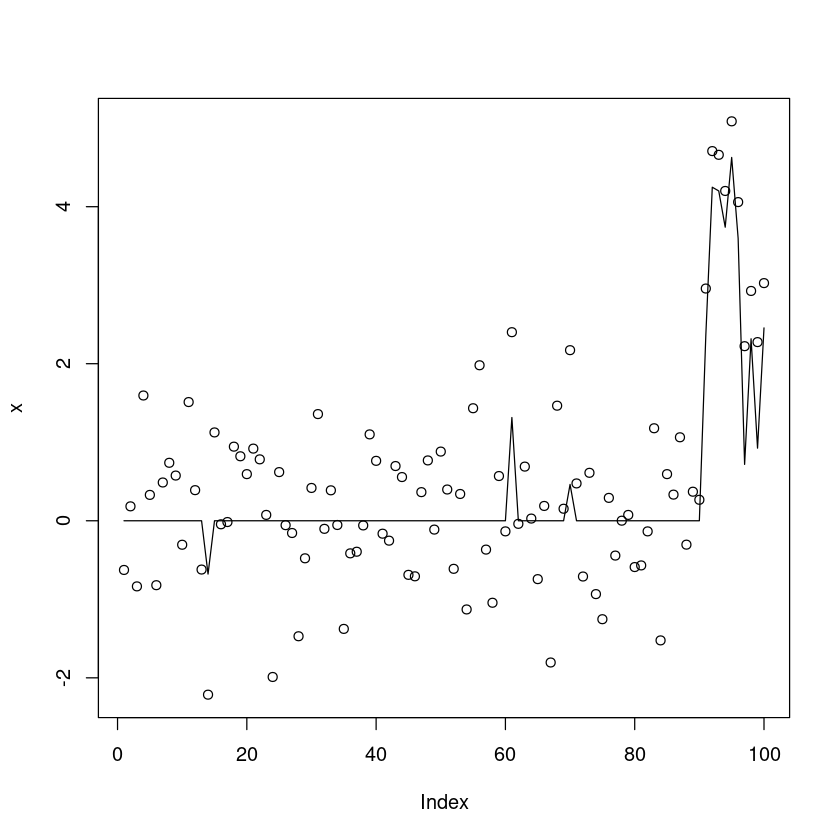

In [27]:
set.seed(1)
mu <- c( rep(0, 90), rep(3.5, 10) )
x  <- rnorm(100, mu)
plot(x)
lines(ebayesthresh(x))

- 90개의 0 중 대부분은 정확하게 추정되지만 3개는 영점으로 추정되지 않았음.
- 반대로 3.5와 같아야 하는 10개의 값(마지막으로 표시할 10개)은 모두 영점이 아닌 것으로 추정
- 그림을 자세히 조사하면 그림의 첫 번째 부분에서 가장 큰 두 데이터 점이 마지막 세그먼트에서 가장 작은 두 데이터 점과 값이 매우 유사해 보임.
- 오른쪽 패널에는 마지막 다섯 점의 평균만 0이 아닌 희소 표본sparse sample에 대한 동일한 절차의 효과가 표시됨
- 이 방법의 적응성adaptivity은 이제 모든 0 평균이 정확하게 추정된다는 사실에 의해 입증 가능.
- the price paid는 영이 아닌 값의 더 큰 축소와 평활화가 이루어진다는 것이고, 그 중 두 값은 0으로 추정

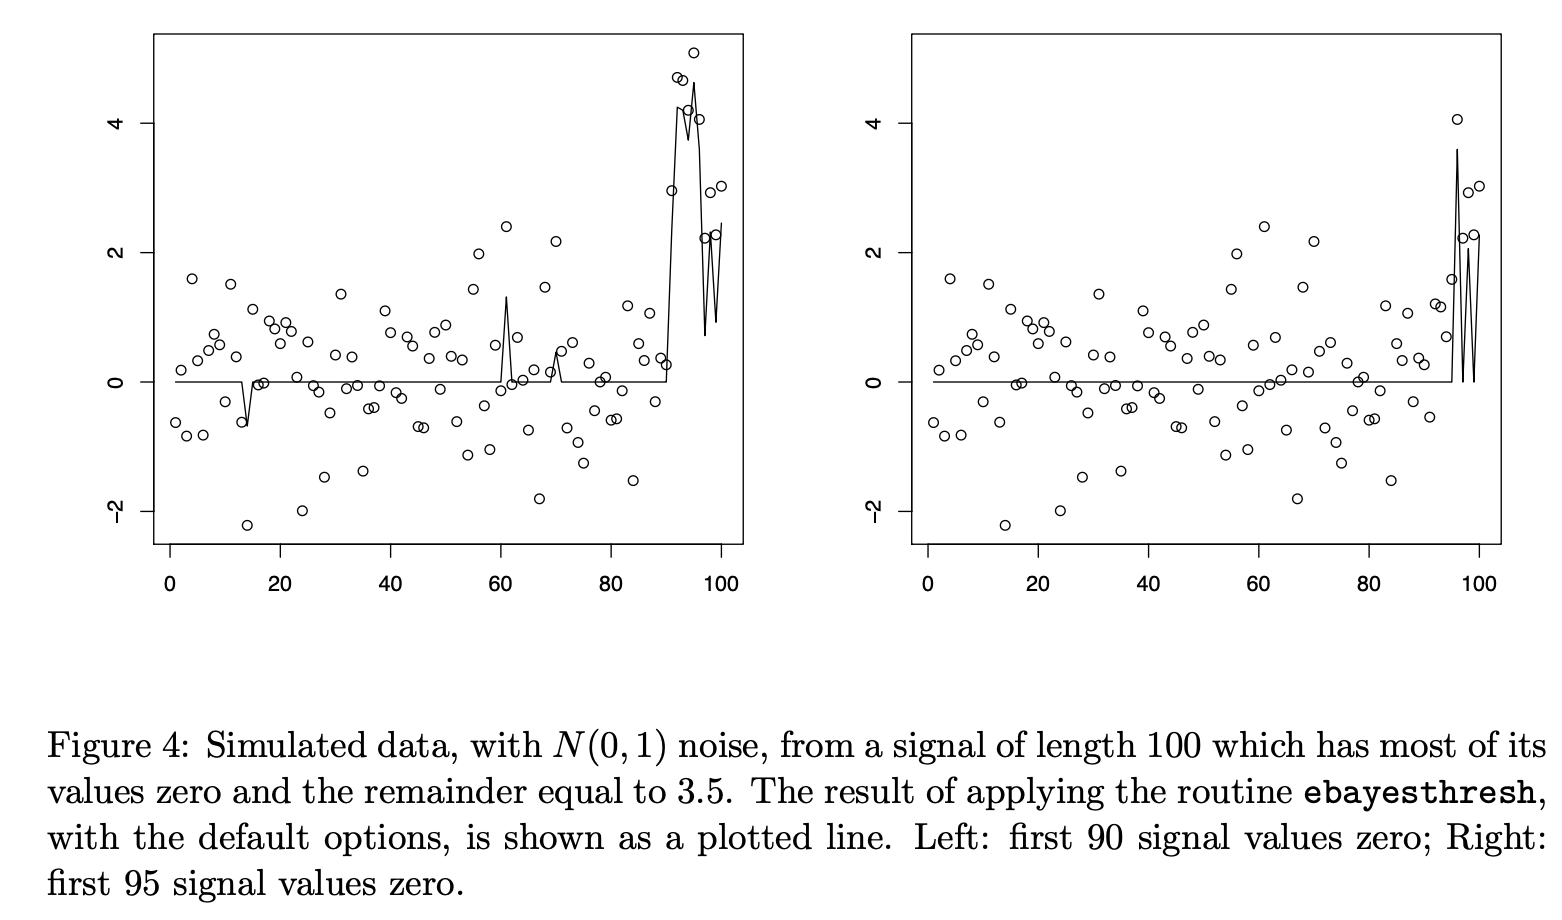

## Varying sparsity in a larger sample

In [29]:
m <-50
mu <- sample( c( runif(m,-5,5), rep(0,10000-m) ) ) 
x <- rnorm(10000, mu)
tt <- tfromx(x)

*routine 인 tformx는 노이즈 표준 편차를 1로 가정하여 threshold의 empirical bayes를 찾음.*

임계값이 발견되면 임계값 루틴(tformx)을 사용하여 원래 데이터의 임계값을 하드 임계값hard threshold^[특정 기준을 넘는 것만 허용한다는 뜻]으로 설정하여 $\mu$의 추정치를 찾을 수 있음

In [31]:
muhat <- threshld(x,tt)

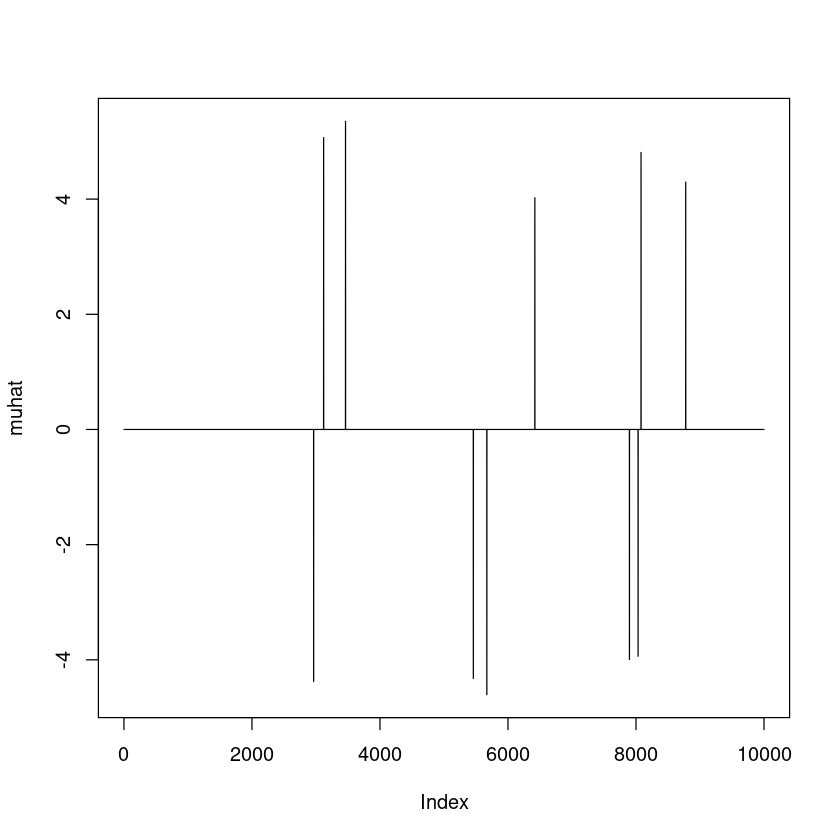

In [36]:
plot(muhat,type='l')

단일 호출single call `ebayeshresh(x, sdev=1, threshrule="hard")`를 통해 얻을 수 있는 동일한 추정 muhat을 보면, 뚜렷하게 threshold를 알 수 있는 것은 아님

- 선택한 임계값을 가장 작은 평균 제곱 오차를 생성하는 임계값과 비교
- 다음 루틴에서는 길이 10000의 신호를 0이 아닌 값이 균일하게 분포된 (-5,5)로 구성
- 임계값의 경험적 베이즈 선택 tebayes와 비교하여 하드 임계값에 대한 최소 평균 제곱 오차를 달성하는 임계값 tbest를 반환
- 제곱합 오차 rebayes 및 rbest도 반환
- EbayesThresh에서 사용된 두 가지 루틴
    - 경험적 베이즈 임계값을 찾기 위한 루틴 tfromx
    - 하드 임계값을 적용하는 루틴 임계값

In [38]:
ebdem1 <- function(m)
{
set.seed(1)
zz <- rnorm(10000)
mu <- c( runif(m,-5,5), rep(0,10000-m) )
x <-mu+zz
tt <- tfromx(x)
tvec <- seq(from = 0, to = 5, by = 0.1)
rvec <- rep(NA, 51)
for ( j in (1:51)) rvec[j] <- sum( (threshld(x, tvec[j]) - mu )^2 ) 
    reb <- sum( (threshld(x, tt) - mu )^2 )
rbest <- min(rvec)
tbest <- mean ( tvec[rvec==rbest] )
return(list(tebayes=tt, rebayes=reb, tbest=tbest, rbest=rbest))
}


예를 들어, 매개 변수 m은 매우 희박한sparse(m = 5) 신호를 완전히 조밀한dense(m = 10000) 신호를 생성하도록 변경될 수 있음.

- 루틴 ebdem1의 출력에 대한 두 개의 플롯
- 왼쪽 그림은 경험적 베이즈 선택 tabayes를 이상적이지만 실제로는 도달할 수 없는 임계값 tbest와 비교
- 오른쪽 그림에서는 하드 임계값 추정치의 제곱합 오차를 두 임계값과 비교

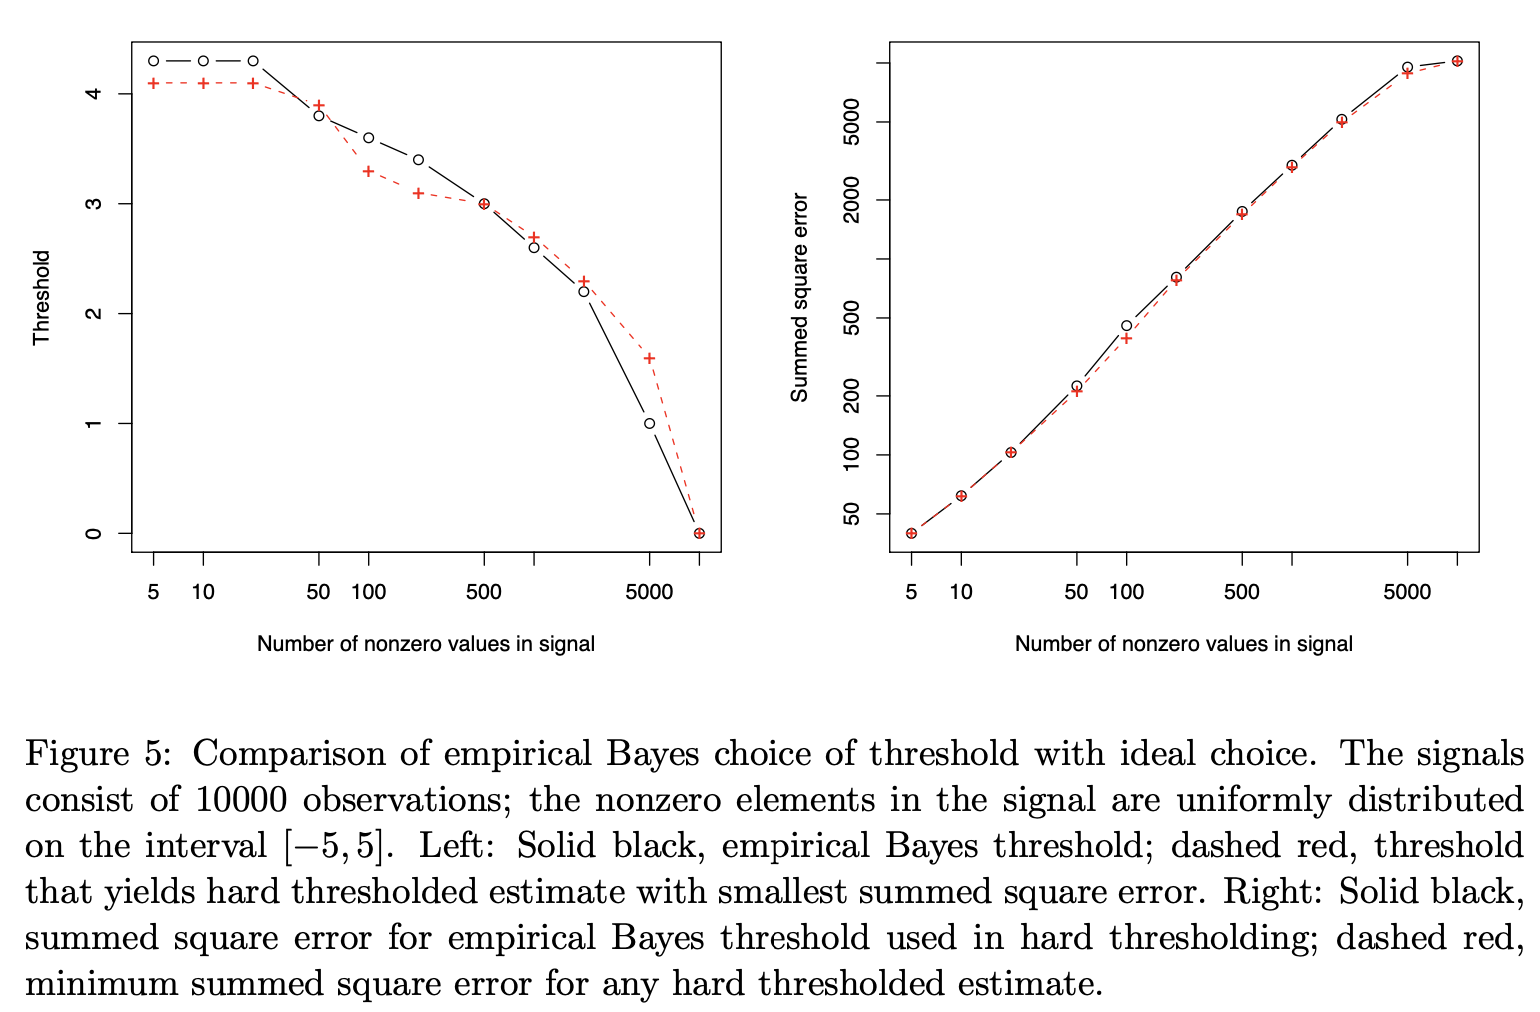

Hard threshold 사용하는 이유

- The reason that we use hard thresholding for the Empirical Bayes threshold, rather than the default posterior median estimator, is that allows an honest comparison with the threshold chosen to minimize error under hard thresholding.
    - 하드 임계값에서 오류를 최소화하기 위해 선택한 임계값과 honest comparison 을 허락하기 때문

## The posterior median thresholding function

routine^[어떤 실행을 하는 코드 블록으로 생각하자] postmed를 사용하여 임계값 함수를 그릴 수 있는데, 이 루틴은 주어진 데이터와 prior distribution에서 주어진 mixing weight에서 posterior median function을 찾음

$w$ 0.02에 대해, quasi-Cauchy prior를 사용하여 아래처럼 계산할 수 있음

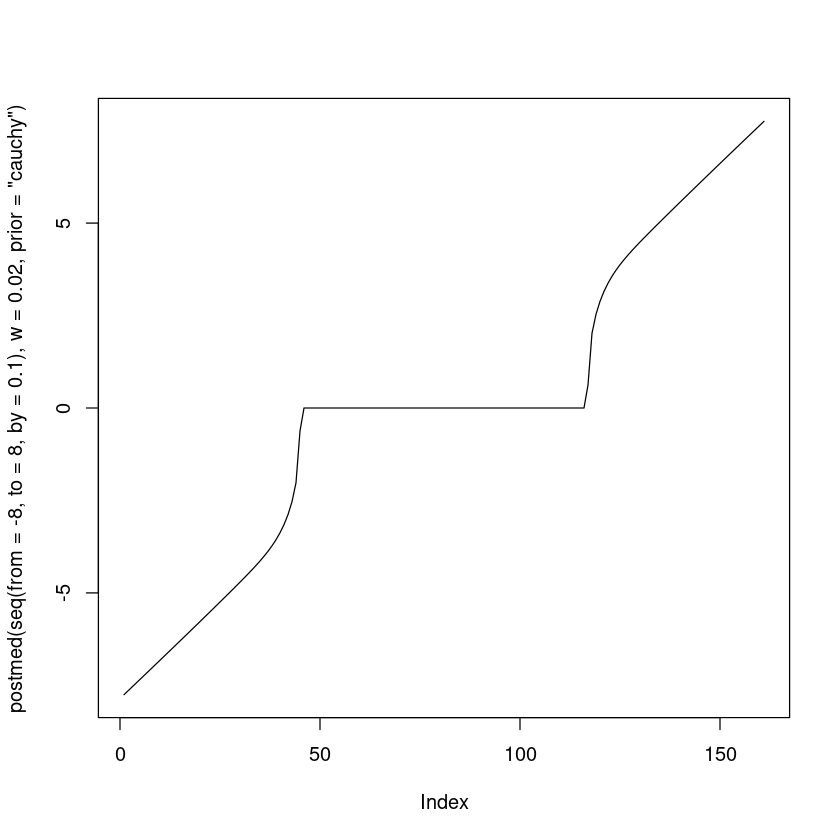

In [42]:
plot(postmed( seq(from=-8, to=8, by=0.1), w=0.02, prior="cauchy"),type='l')

## Other control parameters in the package’s routines


```R
ebayesthresh(x, a=NA)           # Laplace prior, scale factor also estimated
ebayesthresh(x, prior="cauchy") # quasi-Cauchy prior
ebayesthresh(x, a=NA, threshrule="mean") # Laplace prior, scale factor estimated
ebayesthresh(x, a=NA, threshrule="hard") # use posterior mean as estimator
ebayesthresh(x) # Laplace prior, scale factor estimated
ebayesthresh(x, a=0.2) # use hard threshold with estimated threshold
tuniv <- sqrt(2 * length(x)) # Laplace prior with a=0.5 (default)
threshld(x, tuniv) # Laplace prior with a=0.2
threshld(x, tuniv, hard=FALSE)  # soft thresholding with universal threshold
```

# Wavelet thresholding

## Empirical Bayes thresholding of the discrete wavelet transform

*해당 패키지 지원이 되지 않음..이 버전에*

The default action of the routine ebayesthresh.wavelet is to assume that the original signal is observed with independent Gaussian noise with mean zero and constant variance.

ebayeshresh.wavelet 루틴의 기본 동작은 원래 신호가 평균 0 및 상수 분산을 갖는 독립적인 가우스 노이즈로 관찰된다고 가정하는 것

## The estimated thresholds


$N(0,\hat{\sigma^2_i})$를 가정했을때, 분포가 0에 가까울때(6번), std를 0이 아니라 1로 설정하는 게 합리적.

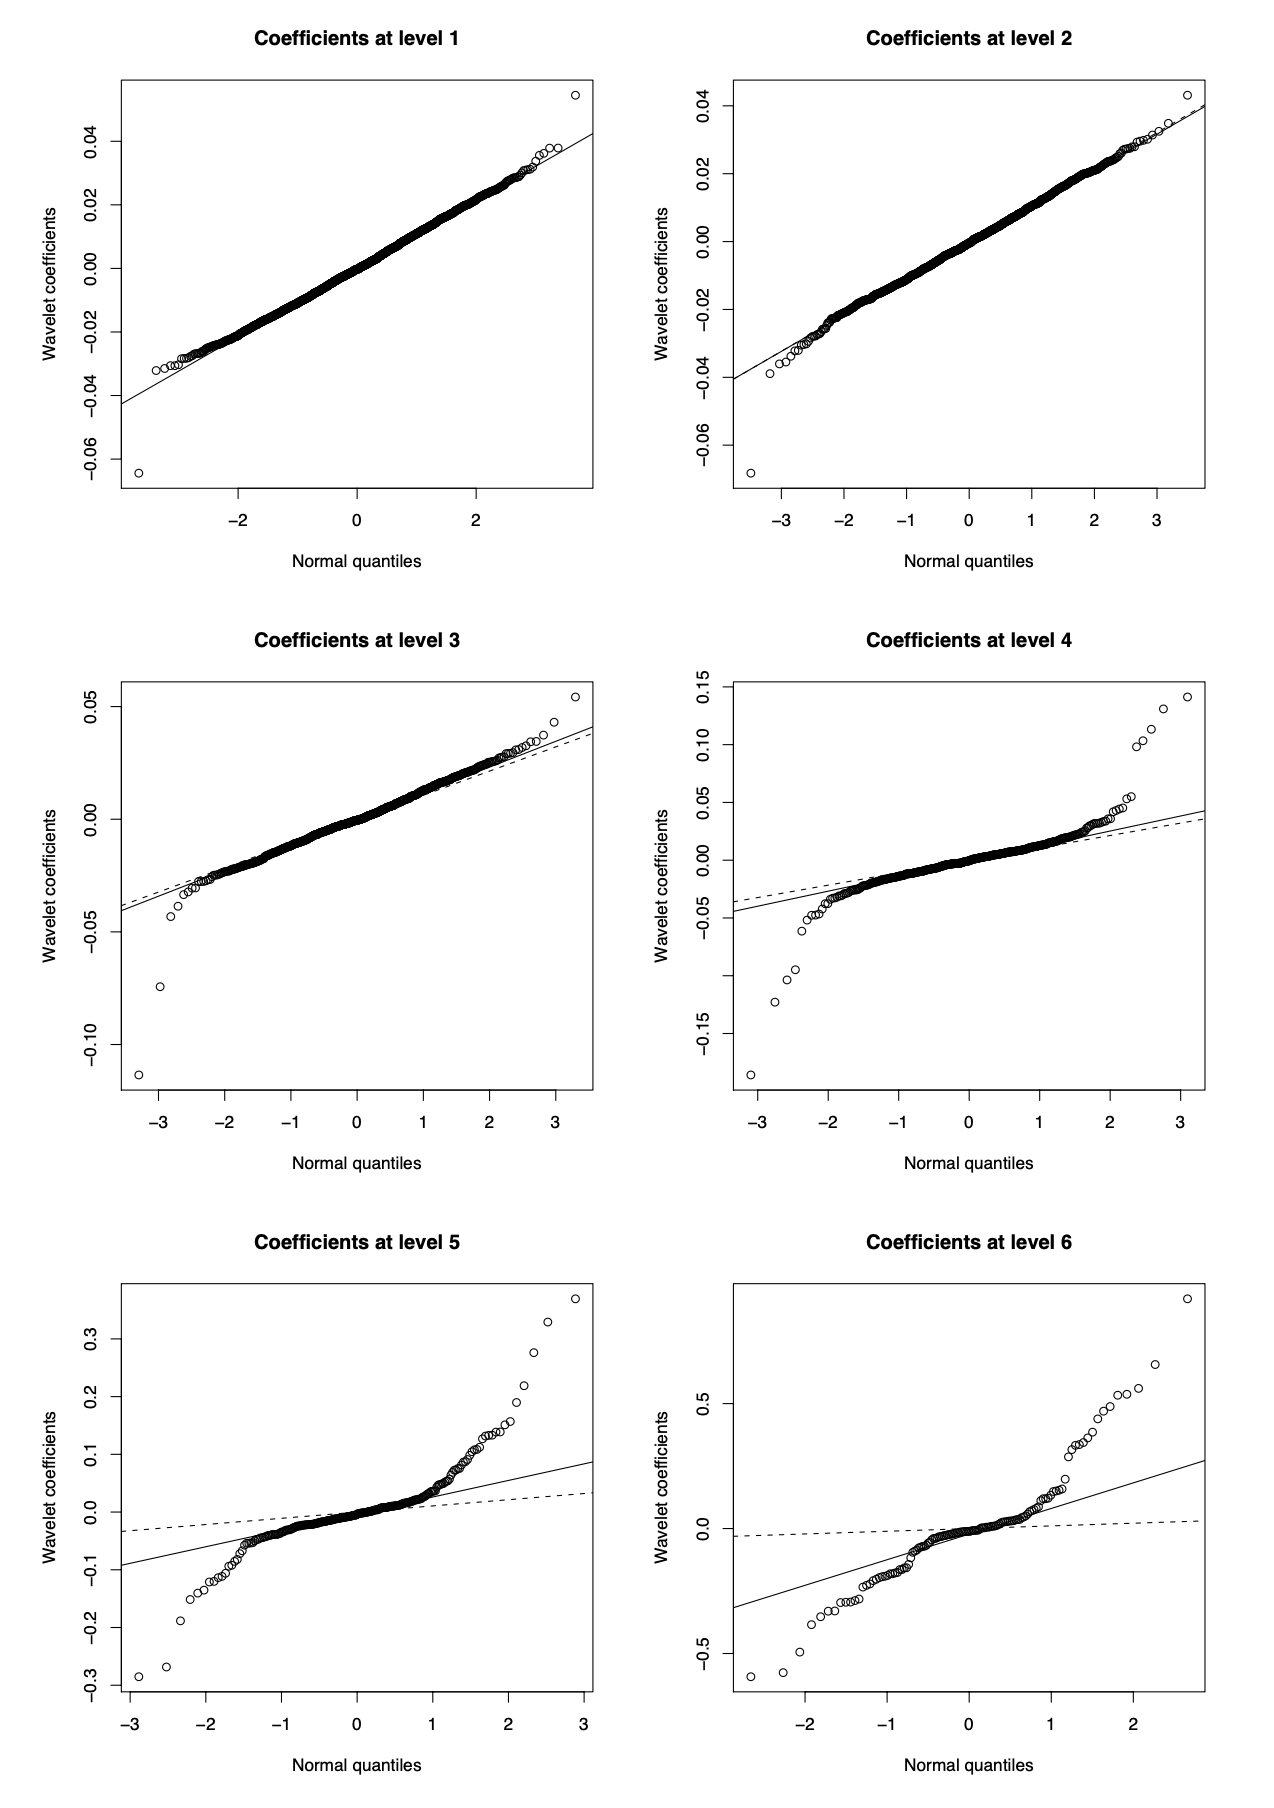

## The stationary noise model

Johnstone과 Silverman(1997)에 따르면 원래 노이즈가 정상성을 띄고 있지만 상관관계가 있는 데이터에 웨이블릿 임계값 방법을 사용할 것을 고려.

노이즈가 독립적인 것처럼 웨이블릿 임계값을 수행하지만 다른 수준에서 다른 노이즈 분산을 허용하는 것이 적절한 접근임을 보임.

이것은 각 수준에서 개별적으로 만들어진 중앙값 절대 편차 함수를 사용하여 잡음 분산을 추정하는 것과 일치합니다. 

ebayesthresh.wavelet 패키지의 the parameter value `vscale`="level"로 수준에 따라 임계값이 계산되기 때문에 level이 coarser(거칠수록) 임계값이 더 커짐

- scale이 커질 수록 sparse희소성이 감소한다는 점을 밝힘

백색소음^[백색소음 모델은 모든 주파수에서 무작위로 생성된 높은 에너지를 가진 잡음으로, 시간상의 자기상관성이 없으며, 각 시간에 대한 샘플들이 서로 독립적으로 생성됩니다. 이러한 특징 때문에 백색소음 모델은 무작위적인 변화를 모사하기 위해 자주 사용됩니다.]

정상소음^[정상소음 모델은 시간에 대한 통계적 특성(예: 평균과 분산)이 일정한 랜덤 프로세스입니다. 이러한 특징은 특정 주파수 대역에서 높은 에너지를 가진 잡음이 아니라, 시간에 따라 변화하는 일반적인 잡음을 모사하기에 더 적합합니다.]

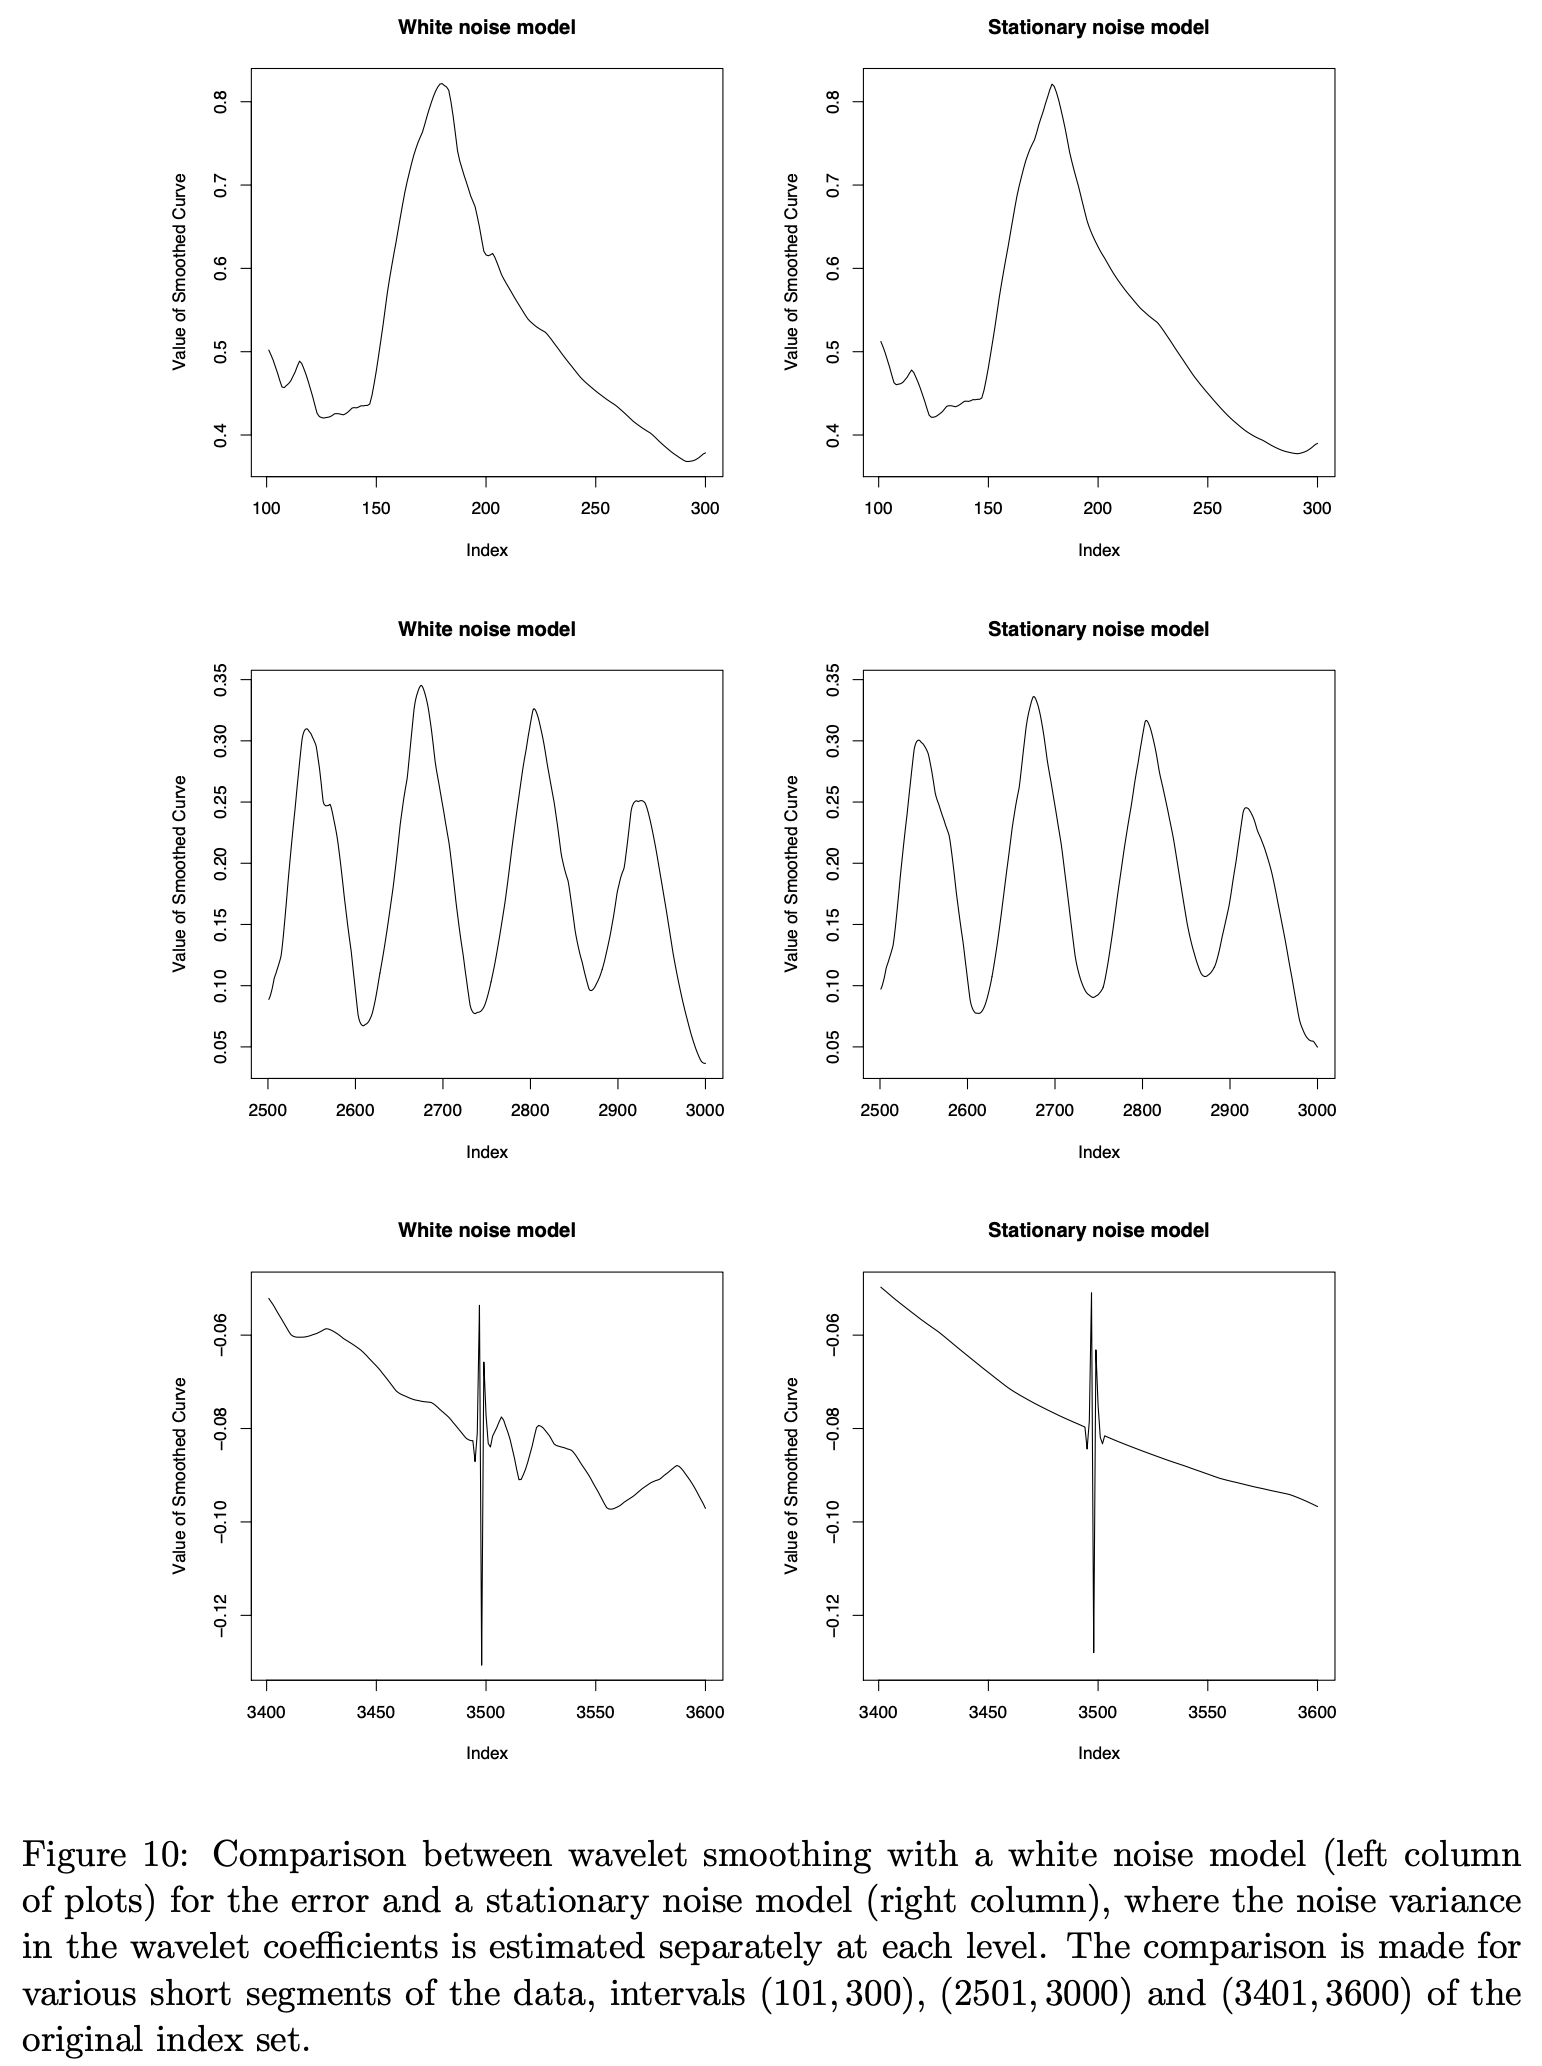

## The translation-invariant wavelet transform

경험적 베이즈 접근법을 수행하는 가장 직관적인 방법은 독립적인 시퀀스처럼 각 수준에서 계수 벡터를 임계값으로 취하는 것.

As discussed in detail in Johnstone and Silverman (2005), the most straightforward way of applying the empirical Bayes approach is to threshold the coefficient vector at each level as if it were an independent sequence. 

## Smoothing an image

- 경험적 베이즈 접근법은 사용된 변환에 상관없이 동일하게 적용 가능
- 추정되는 함수 또는 이미지의 표현에서 희소성을 활용할 것이므로, 이러한 유형의 이미지의 표현에 더 구체적으로 적합한 사전이 사용된다면 훨씬 더 나은 결과가 기대됨

# More general mixture weight structure

## Increasing sparsity along the sequence


$\mu_i$가 0인 prior probability이 $i$가 증가할수록 같이 증가하는 것으로 합리적으로 고려된다는 점에서 $i$가 증가함에 따라 더 sparse해진다고 여겨지는 single sequence^[연속된 데이터 포인트의 나열] $\mu_i$가 있다고 가정하자.

예를 들어, $\mu_i$는 시퀀스(sequence)의 각 항(term)^[시퀀스에서 하나의 데이터 포인트]이 관심 대상인 함수 또는 현상^[observed data]의 다른 크기(scale)의 측면을 묘사하는 large-scale을 설명하는 함수의 사전^[통계학이나 머신 러닝 등에서 사용되는 용어로, 특정한 현상이나 데이터의 특징을 나타내는 다양한 변수들을 모아 놓은 집합]에서 계수일 수 있다.이 사전에 있는 변수들에 의해 우리는 모델링이 되고 예측을 한다.

natural approach는 $\mu_i$를 이전과 같은 형태의 prior distribution^[베이지안 통계학에서 모델링을 시작하기 전에 사용되는 초기 분포]을 가지지만 $i$에 의존하는 가중치 $w$를 가지고 있어서 아래와 같은 prior density^[사전 분포의 밀도 함수(density function)]를 모델링^[$i$에 따라 가중치가 다르게 적용된 사전 분포를 사용하여 $\mu_i$를 모델링하는 방법을 제안]하는 것이다.

- 각 항이 가지는 중요도를 고려하여 i에 따라 가중치가 부여
- "$\mu_i$"는 i번째 항에 해당하는 계수(coefficient)를 의미
- 이러한 사전 분포는 모델링에 사용되는 데이터 이전에 존재하는 정보를 반영하며, 이를 기반으로 모델을 구성하는 과정에서 업데이트함.

$$(1-w_i)\delta(u) + w_i\gamma(u)$$

여기서 $w_i$를 구하려면 log marginal likelihood 를 최대화하는 것으로 $\hat{w}_i$를 선택하면 된다.

- 단, $w_1 \ge w_2 \ge \dots \ge w_n$

$$\ell(w_1, \dots, w_n) = \sum^n_{i=1} log\{(1-w_i)\emptyset(x_i) + w_i g(x_i)\}$$

일단 가중치가 추정되면, $\mu_i$를 각각 추정할건데 mixing parameter $w_i$를 가진 베이지안 모델에 근거한 임계값 규칙을 사용.

routine `wmonfromx`

- $w_i$에 해당하는 모든 임계값들이 $\sqrt{2 log n}$에 의해 제한된다는 조건에 따라 추정을 진행.

In [50]:
set.seed(1)
pp <- 1- ((1:2000)/2000)^0.25
mu <- runif(2000, -7,7)*rbinom(2000,1,pp)

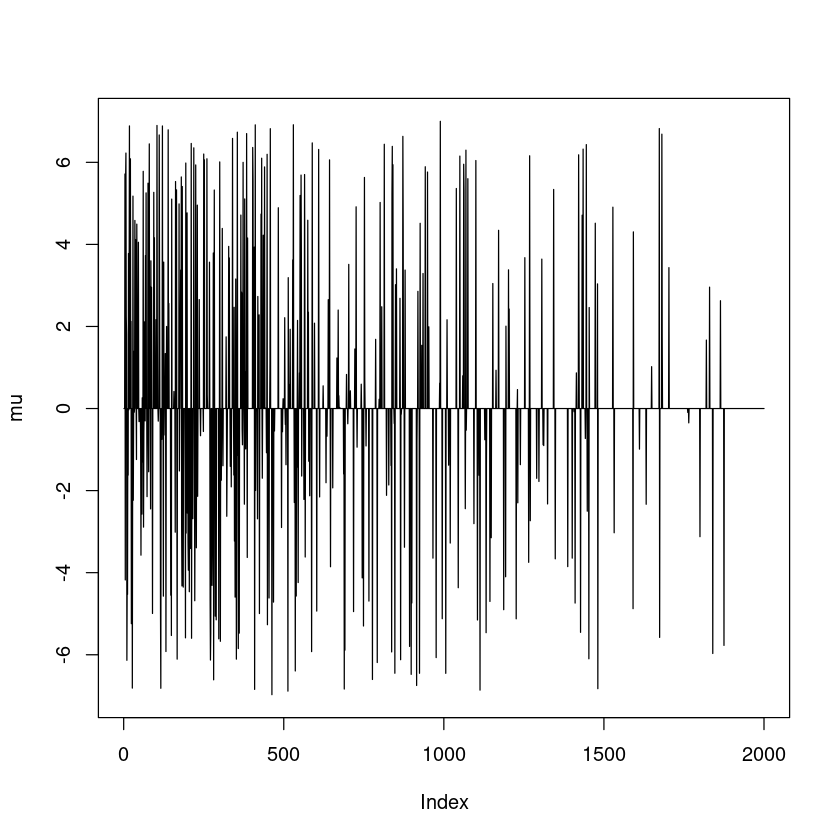

In [53]:
plot(mu,type='l')

이 signal에서 0이 아닌 값이 [-7,7] 사이에 균등하게 분포되어 있음.

증가하는 sparsity희소성은 특정 지점까지 0이 아닌 점의 

- 예를 들어, 0이 아닌 값의 절반 이상이 the first quarter of the sequence에서 발생함. 
- 이는 시퀀스의 처음 250개의 위치에서는 123개의 0이 아닌 값이 발생하지만, 마지막 250개의 위치에서는 단 8개만 발생한다는 것을 보여줌.
- 시계열 데이터의 희소성과 노이즈가 추가된 데이터로부터 추정된 monotone weights를 사용한 추정 결과(아래)를 보여줌

In [60]:
wmon   <- wmonfromx(x)
thresh <- tfromw(wmon)
muhat  <- postmed(x,wmon)

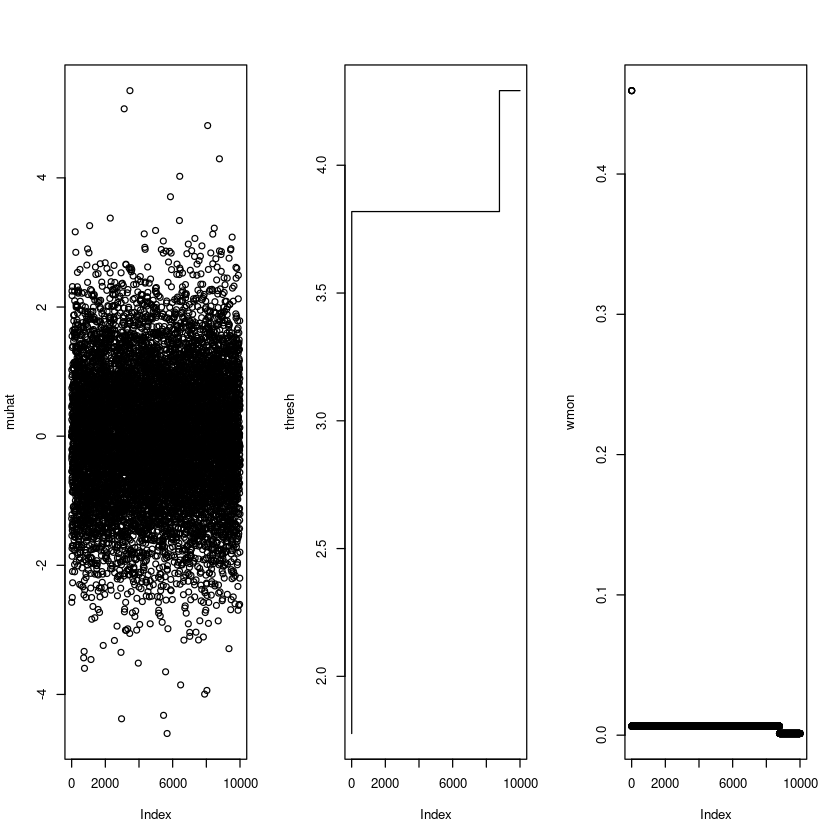

In [71]:
par(mfrow = c(1,3))
plot(muhat)
plot(thresh,type='l')
plot(wmon)

:::{.callout-note}
Monotone weights는 Bayesian adaptive regression spline (BARS) 모형에서 사용되는 가중치(weight)입니다. BARS 모형은 회귀분석 모형으로, 자료에 대한 적합성을 높이기 위해 여러 개의 스플라인(spline) 함수를 결합하여 모델을 구성합니다. 이때, 스플라인 함수의 가중치가 작을수록 해당 함수는 모델에 미치는 영향력이 작아지며, 가중치가 크면 해당 함수의 영향력이 커집니다.

Monotone weights는 이 가중치를 설정하는 방법 중 하나로, 스플라인 함수가 증가하는 방향으로만 움직이도록 제한합니다. 따라서 monotone weights를 사용하면 모델이 단조적으로 증가하는 형태를 띄게 되며, 시계열 데이터와 같이 시간적인 변화를 반영해야 하는 경우에 유용하게 사용됩니다.
:::

위에서 추정된 weights가 구간마다 일정한 값을 유지하다가 (constant), 갑자기 내려가는 (downward jumps) 구간이 있는 것을 확인할 수 있는데 이 추정 결과는 Monotonicity constraint가 적용된 시계열 데이터에서 특징적으로 나타남.

Monotonicity constraint가 적용된 시계열 데이터에서는, 점프가 발생하는 위치가 인공적인 "levels"로 시계열을 분할하는 데 사용될 수 있음.

:::{.callout-note} Monotonicity constraint란, 특정 변수의 값이 증가하거나 감소하는 방향으로 제한하는 제약조건입니다. 이는 데이터에서 관찰되는 특정 패턴을 모델링하고자 할 때 유용하게 사용됩니다. 

시계열 데이터에서는, 시간의 흐름에 따라 값이 증가하거나 감소하는 경향성이 있는 경우가 많습니다. 이때, Monotonicity constraint를 적용하면, 모델링에 더 적합한 결과를 얻을 수 있습니다. 

예를 들어, 시계열 데이터에서는 Monotonicity constraint를 사용하여 값이 증가하는 경향성이 있는 변수를 모델링할 수 있습니다. 이때, Monotonicity constraint를 적용하면 모델링에 불필요한 노이즈가 제거되고, 보다 정확한 예측 결과를 얻을 수 있습니다. 

예) 주식시장에서 어떤 종목이 상승하고 있을 때 상승한다는 monotonicity contraint를 적용하면 더 정확한 분석이 가능:::

## Parametric dependence

sequence를 따라 감소하도록 제한된 weight고려

Possibility

- 상수 $c_i$를 알고 있고,
- 가중치가 $c_i$에 비례하여 비례proportional 상수를 추정할 수 있기를 바라는 것

EbayesThresh 패키지의 `zetafromx` 루틴으로 구현

- basic model = $w_i = c_i \zeta$, $c_i$는 상수
- $w_{lo}$를 가중치 $t(w{lo}=\sqrt{2 log n}$을 가지는 가중치로 생각.
- $w_{lo} \le w_i \le 1$으로 조건 주리 위해 아래 모델을 가정

$$w_i(\zeta) = median \{ w_{lo} , c_i \zeta, 1\}$$

- $\zeta$는 비례 상수가 아니라 가중치 파라미터가 됨.
- $\gamma$와 $\emptyset$을 convolution한 것을 $g$라 놓고, 아래처럼 marginal log likelihood function으로 $\zeta$를 구할 수 있음.

$$\ell(\zeta) = \sum_i log[ \{1- w_i (\zeta) \} \emptyset (z_i) + w_i(\zeta) \gamma (z_i)]$$

In [75]:
wts   <- zetafromx(x, cs=1/(1:2000))$w #   find weights
muhat <- postmed(x, wts) #   carry out estimation
thresh<- tfromw(wts) #   find thresholds

위처럼 역수 취해서 감소하게 만들어서 routine 이용하여 $\ell(\zeta)$찾을 수 있음